Some code verifying and playing around with generator set calculations. Initially just the CY case from Wang et Al 2022

First imports and conveniant gate definitions

In [58]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import useful_op_fcns as uof

sX=np.array([[0, 1], [1, 0]])
sY=np.array([[0, -1j], [1j, 0]])
sZ=np.array([[1, 0], [0, -1]])
I=np.array([[1, 0], [0, 1]])
H=np.array([[1, 1], [1, -1]])/np.sqrt(2)



In [55]:
CY1=uof.CGATE(sY, target=1)
CY2=uof.CGATE(sY)

genset1_Wang_ea22Y=np.array([sY, H])
genset2_Wang_ea22Y=np.array([CY1, CY2])


Permuting the 1-qubit operators, we identify an additional element, prpoprtional to \sigma_X-\sigma_Z which we define with a conveniant normalization

In [70]:
Htild=uof.MATRIX_CHECK(uof.COMMUTATOR(sY, H), rtn="test")/2
genset1_Wang_ea22Y=np.array([sY, H, Htild])

print(uof.MATRIX_CHECK(uof.COMMUTATOR(Htild, H), rtn="test"))

[[0.+0.j 0.-2.j]
 [0.+2.j 0.+0.j]]


While we're in the 1D case, let's visualize the region of Hilbert space this covers. We can build any normalized linear combination of $Y, X+Z, X-Z$. So for $p_{+}, p_2-\in[0, 1)$ in a range, we plot $p_Y=\sqrt(1-p_+-p_-)$ 

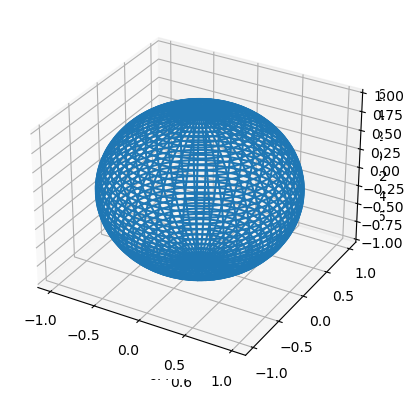

In [80]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax2=fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
r=1
x =  r* np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r* np.outer(np.ones(np.size(u)), np.cos(v))

pp =(x+z)/2
pm = (x-z)/2
ax.plot_surface(pp, y, pm)
ax2.plot_wireframe(x, y, z)
ax.set_aspect('equal')


plt.show()